In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Cargar el dataset
df = pd.read_csv("../data/criptos_por_categoria.csv")

In [4]:
# Filtrar criptos con market cap válido
df_filtrado = df.dropna(subset=['market_cap'])
df_filtrado = df_filtrado[df_filtrado['market_cap'] > 0]

In [5]:
# Crear grafo
G = nx.Graph()

In [6]:
# Agregar nodos
for _, row in df_filtrado.iterrows():
    G.add_node(row['id'], name=row['name'], category=row['category'], market_cap=row['market_cap'])


In [7]:
# Agregar aristas: misma categoría y market cap parecido (<10% diferencia)
for i in range(len(df_filtrado)):
    for j in range(i+1, len(df_filtrado)):
        c1 = df_filtrado.iloc[i]
        c2 = df_filtrado.iloc[j]
        
        if c1['category'] == c2['category']:
            cap1 = c1['market_cap']
            cap2 = c2['market_cap']
            if cap1 > 0 and cap2 > 0:
                diff = abs(cap1 - cap2) / max(cap1, cap2)
                if diff < 0.1:
                    G.add_edge(c1['id'], c2['id'], peso=1 - diff)

In [8]:
# Visualizar subgrafo solo para categoría Inteligencia Artificial
ia_ids = df_filtrado[df_filtrado['category'] == 'Inteligencia Artificial']['id'].tolist()
subG = G.subgraph(ia_ids)

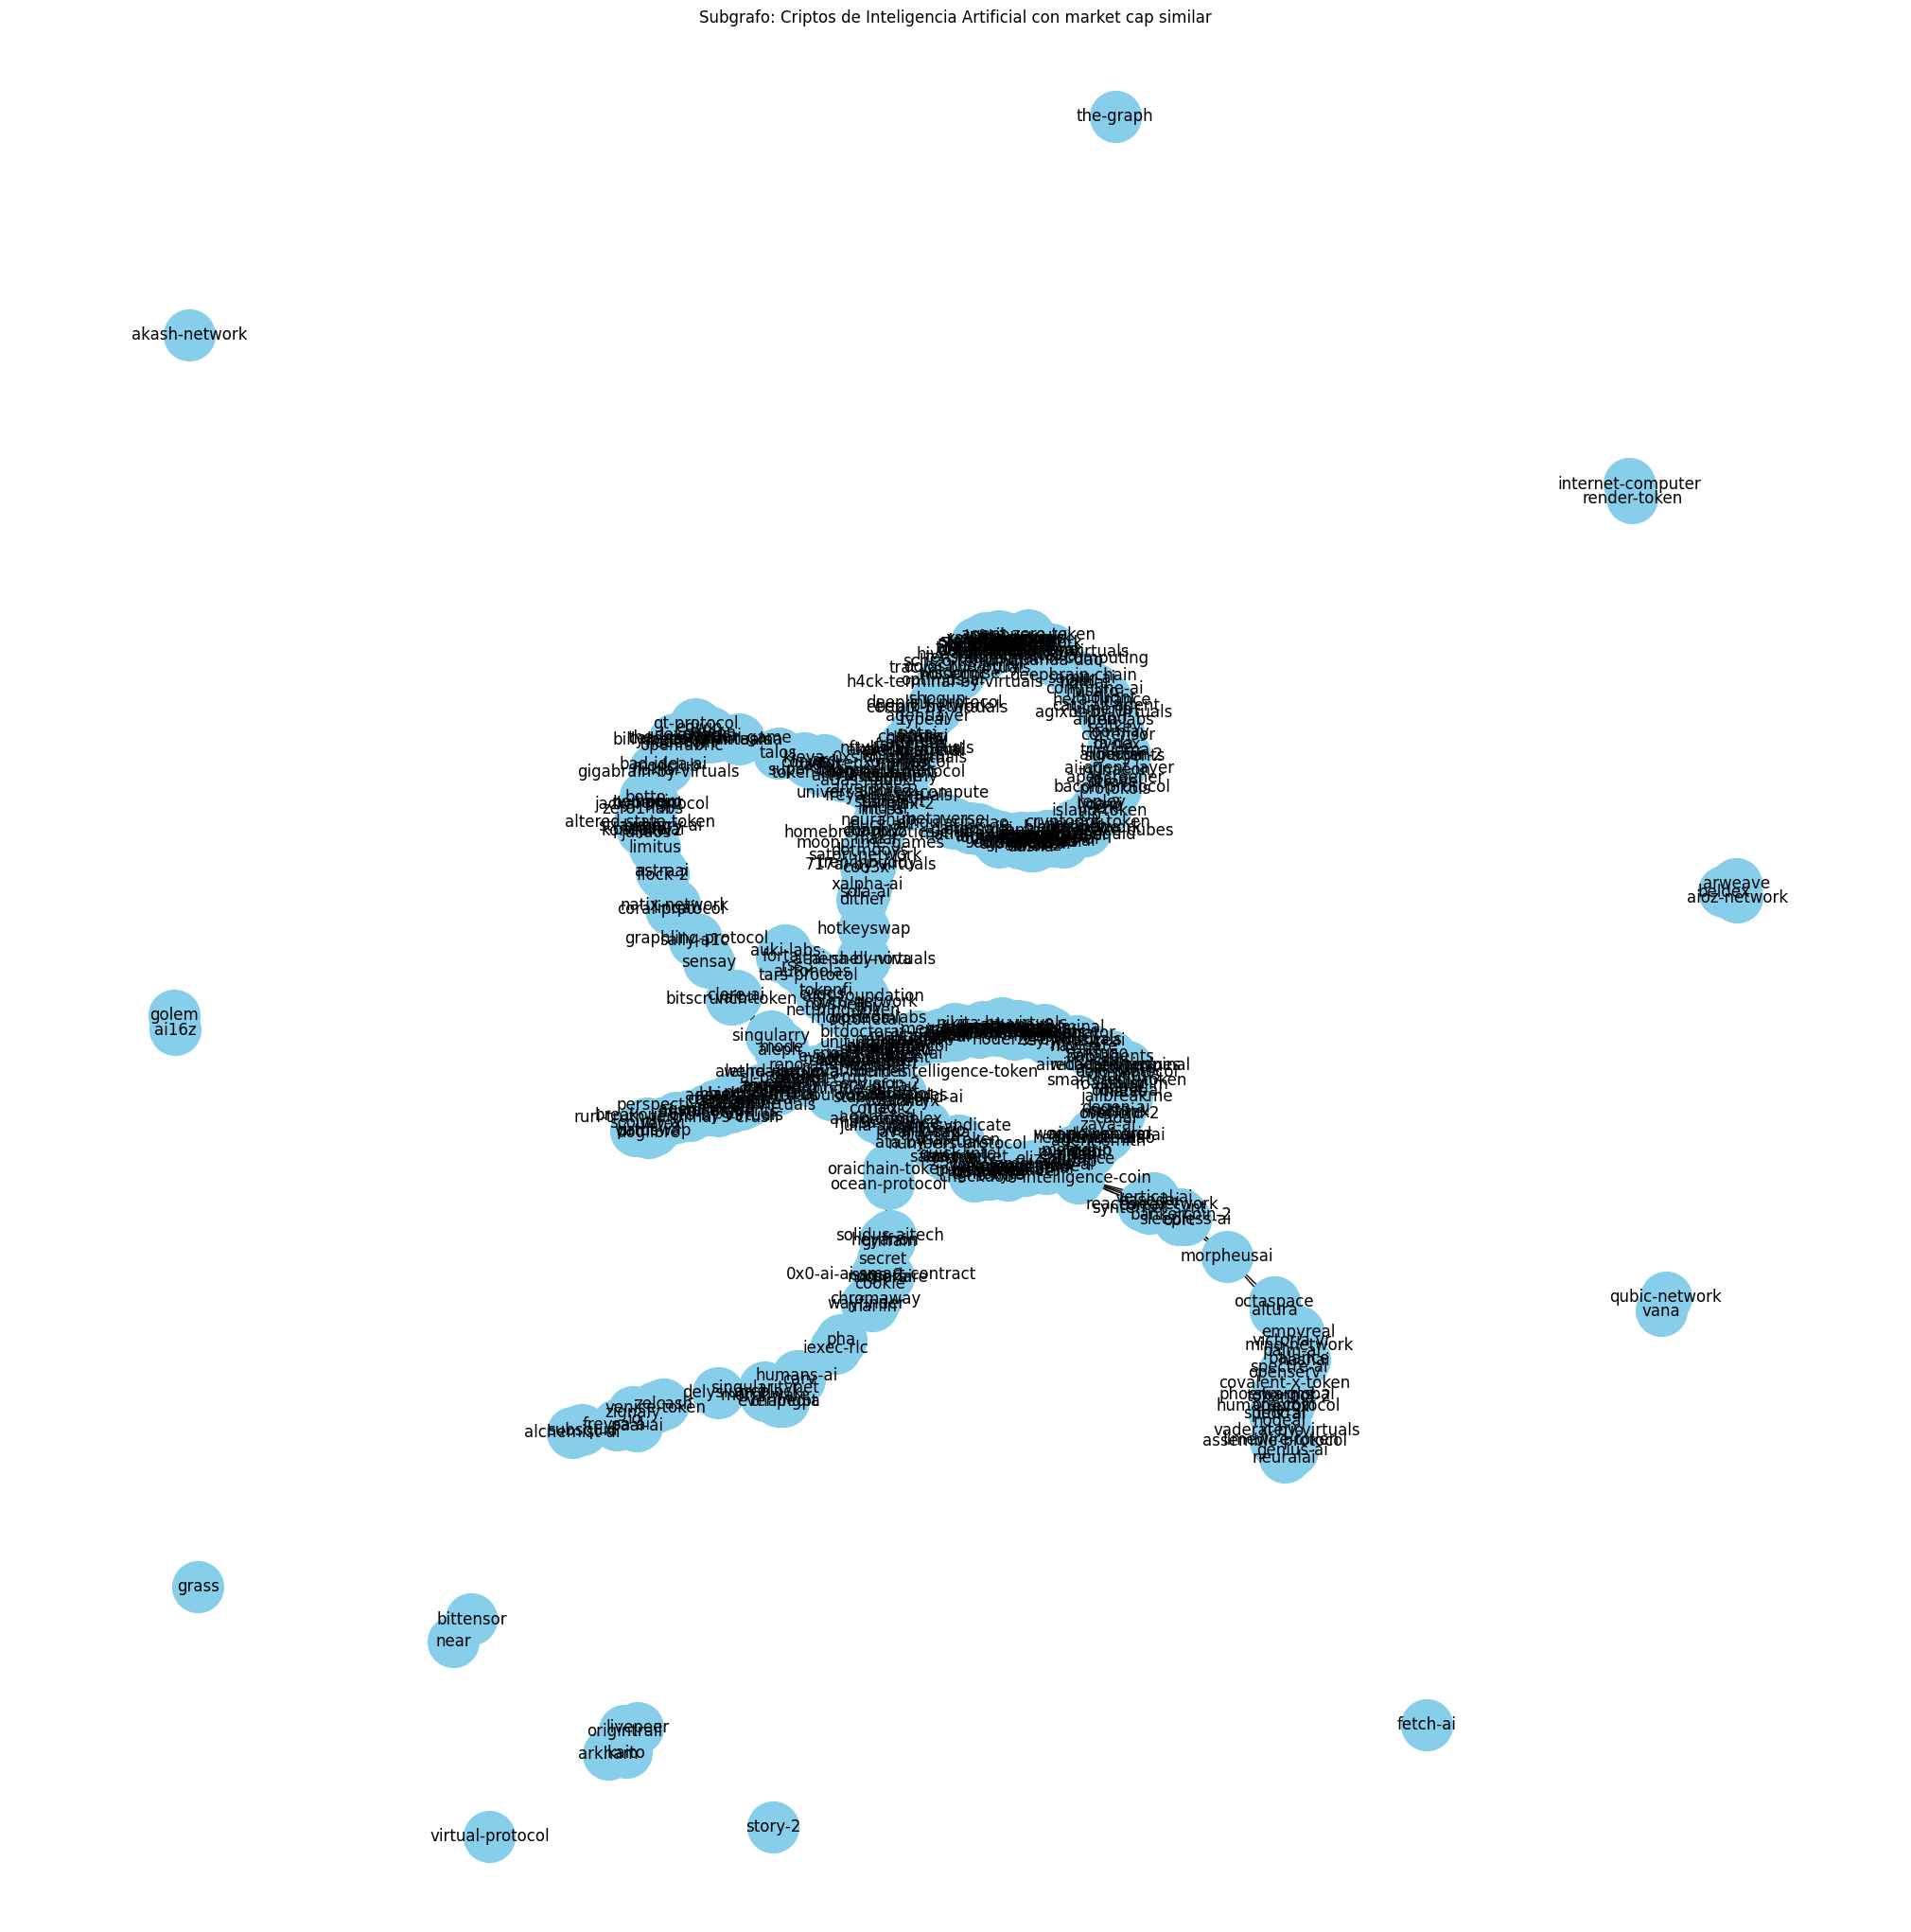

In [11]:
plt.figure(figsize=(20, 20))  # Más espacio
nx.draw(subG, with_labels=True, node_color='skyblue', node_size=1500)
plt.title("Subgrafo: Criptos de Inteligencia Artificial con market cap similar")
plt.show()

Nodos: 500
Aristas: 3736


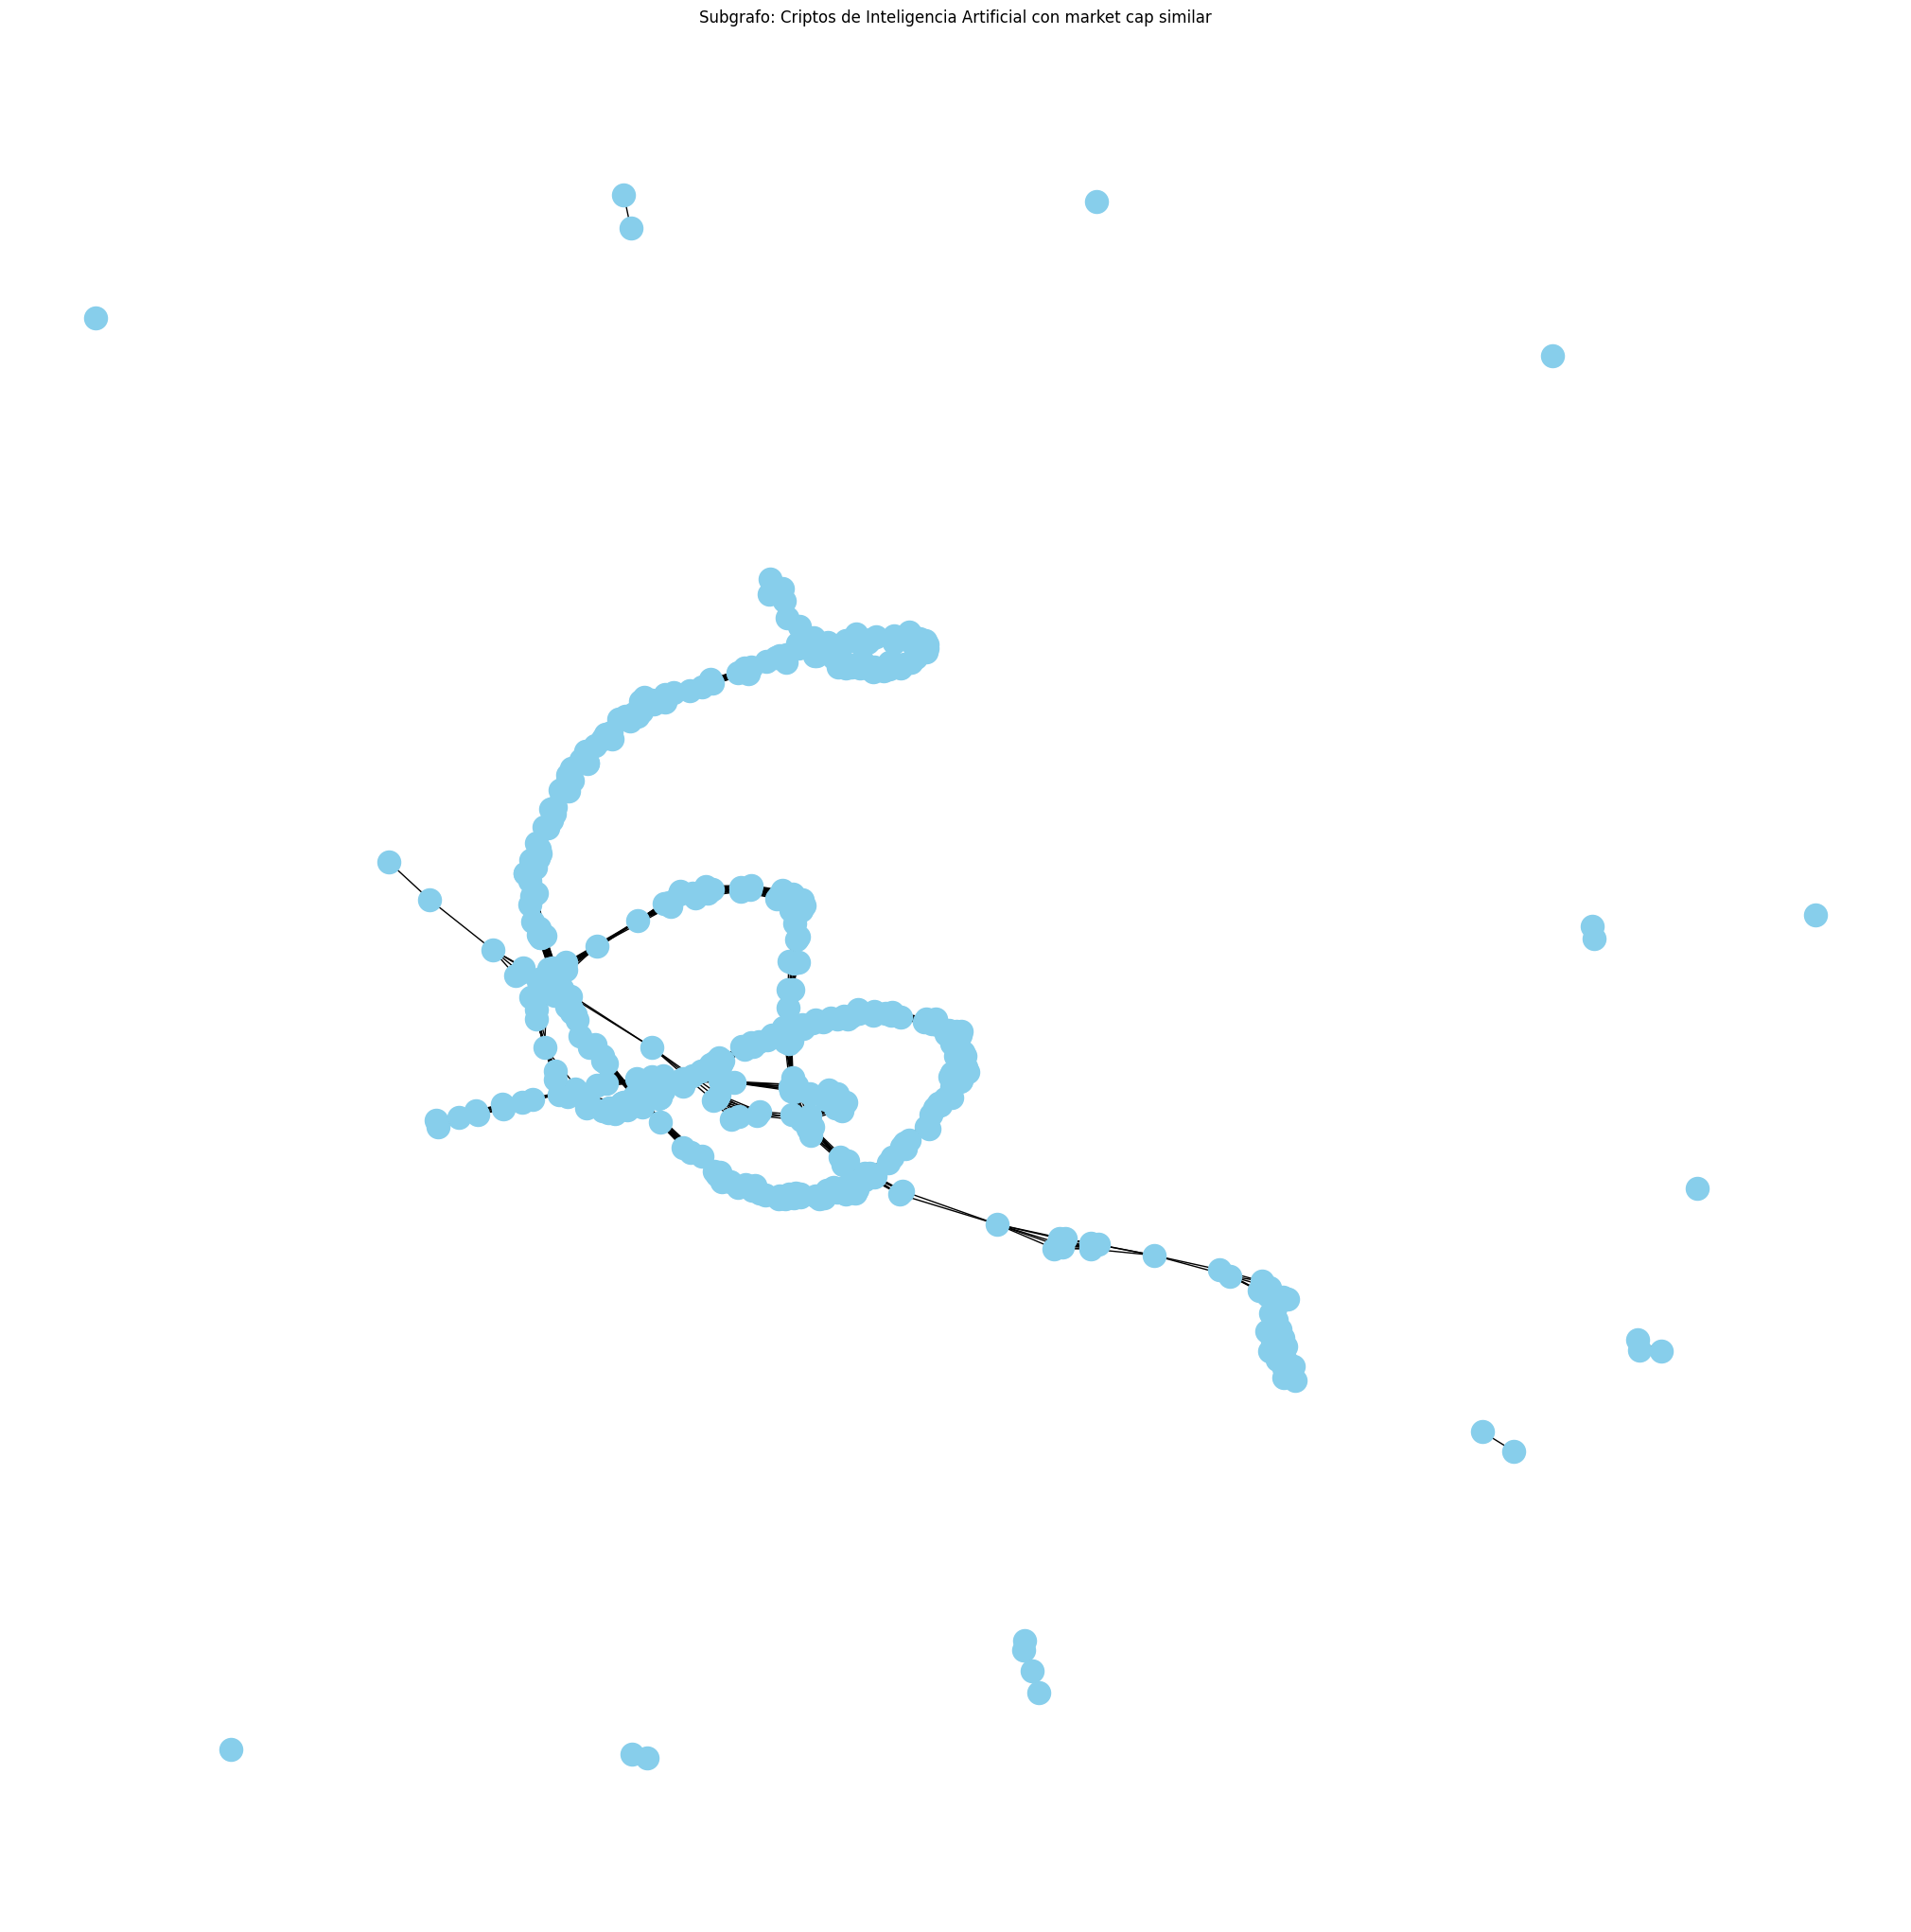

In [21]:
plt.figure(figsize=(20, 20))  # Más espacio
print(f"Nodos: {len(subG.nodes())}")
print(f"Aristas: {len(subG.edges())}")
nx.draw(subG, node_color='skyblue', node_size=300)  # sin `with_labels=True`
plt.title("Subgrafo: Criptos de Inteligencia Artificial con market cap similar")
plt.show()

Nodos: 500
Aristas: 3736


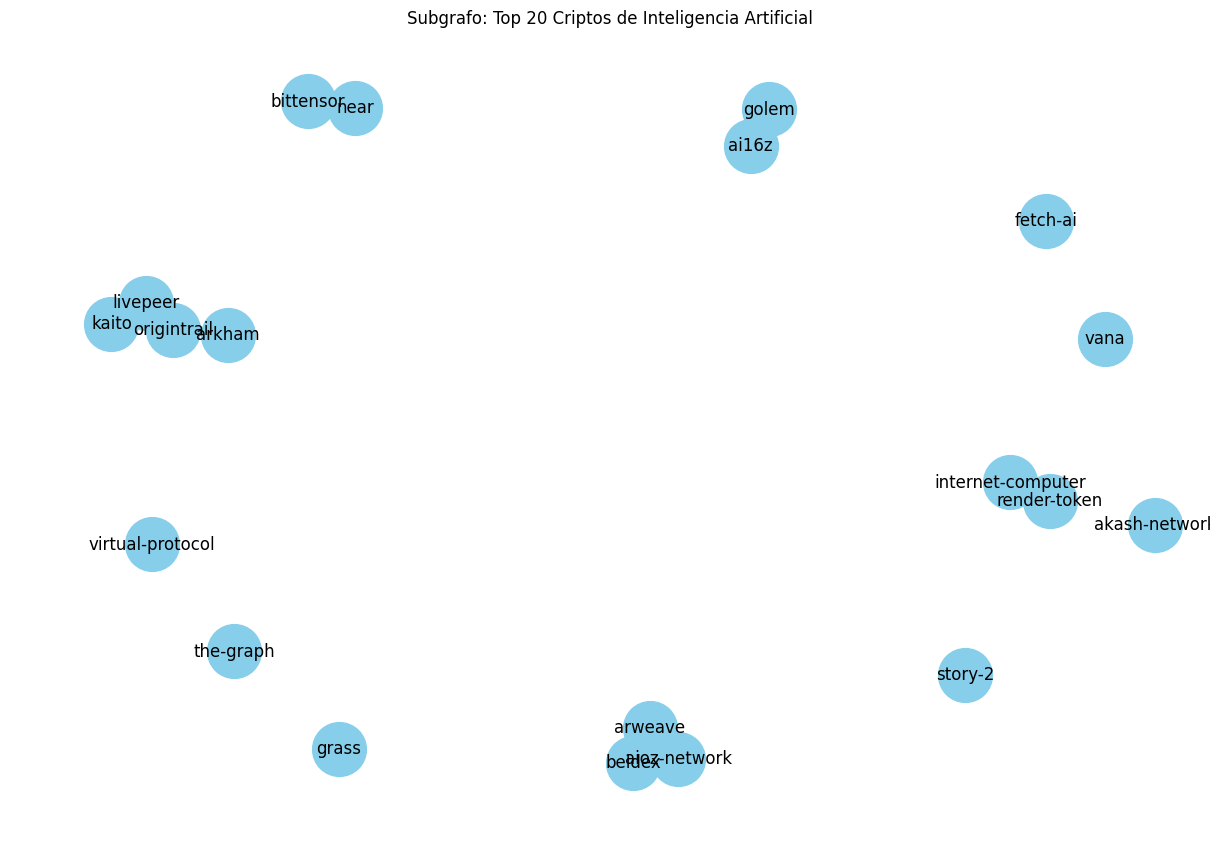

In [22]:
# Ejemplo: las 20 criptos de IA con mayor market cap
top20_ia = df_filtrado[df_filtrado['category'] == 'Inteligencia Artificial'].nlargest(20, 'market_cap')['id'].tolist()
subG_top = G.subgraph(top20_ia)

plt.figure(figsize=(12, 8))
print(f"Nodos: {len(subG.nodes())}")
print(f"Aristas: {len(subG.edges())}")

nx.draw(subG_top, with_labels=True, node_color='skyblue', node_size=1500)
plt.title("Subgrafo: Top 20 Criptos de Inteligencia Artificial")
plt.show()

# Despliegue de la Red

Nodos: 500
Aristas: 3736


C:\Users\nikol\AppData\Local\Temp\ipykernel_51528\1919447844.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


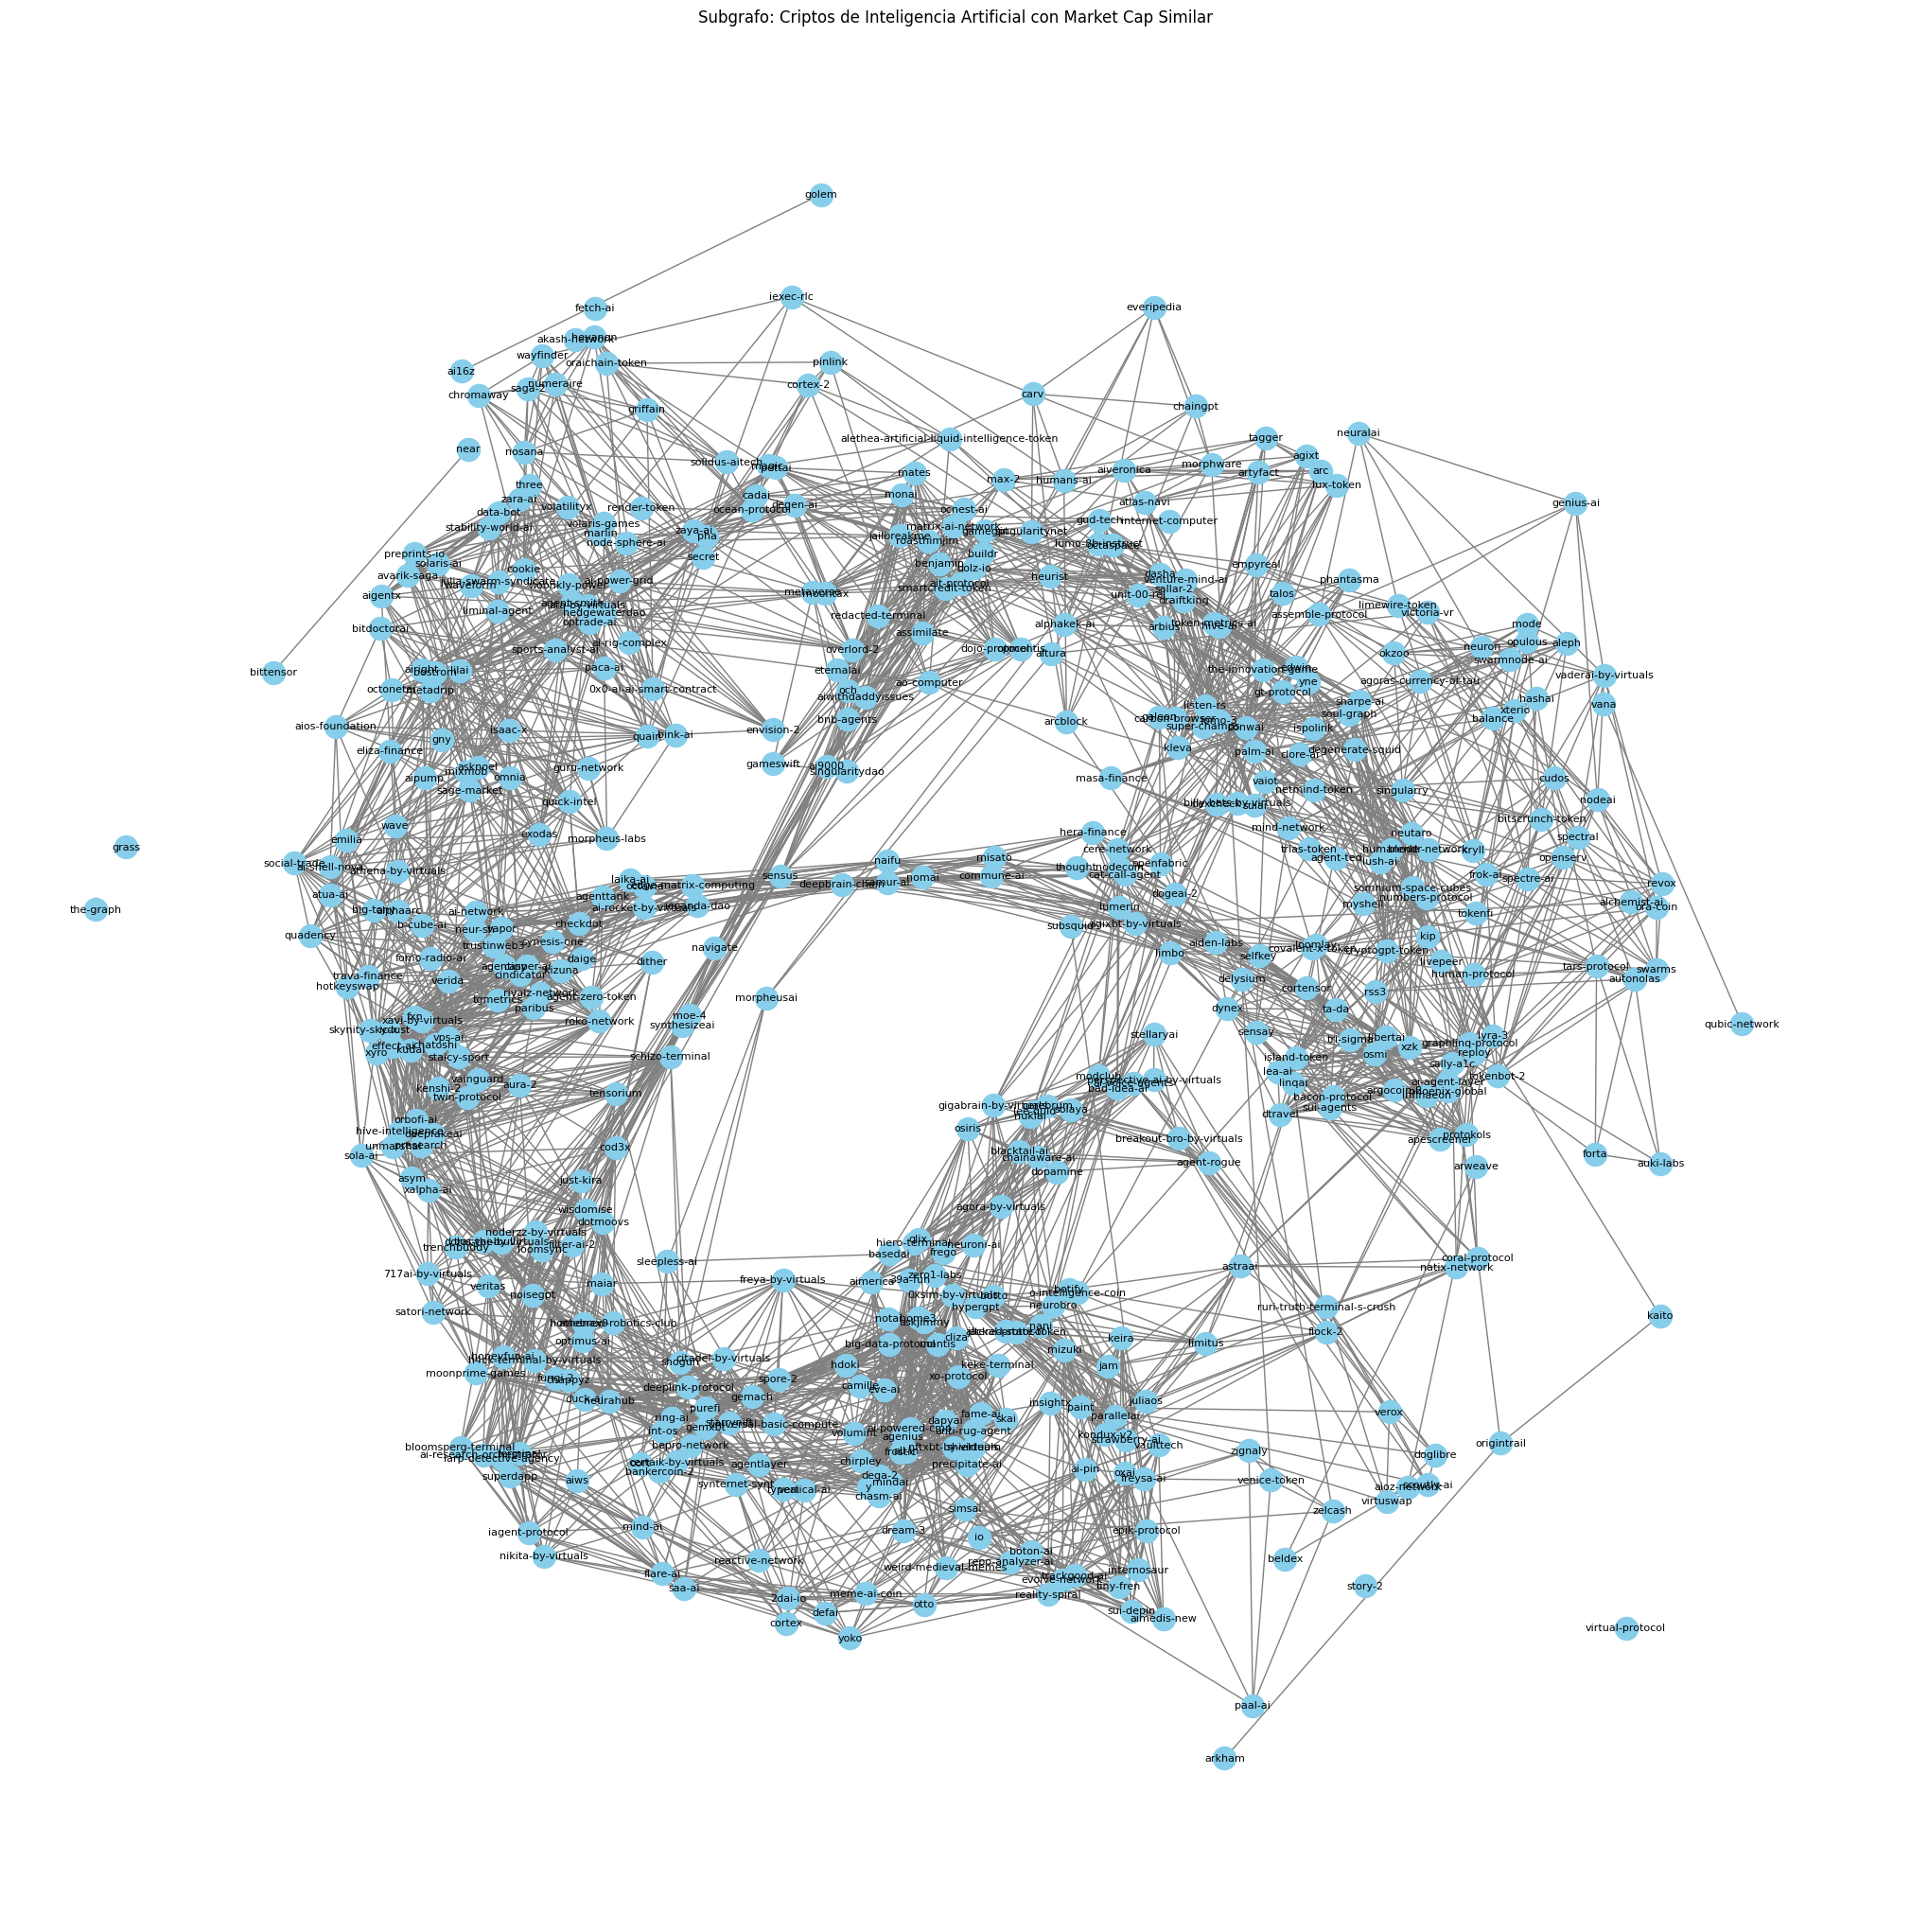

In [23]:
plt.figure(figsize=(20, 20))

print(f"Nodos: {len(subG.nodes())}")
print(f"Aristas: {len(subG.edges())}")

# Layout para una mejor distribución espacial
pos = nx.spring_layout(subG, k=0.15, iterations=20)

# Dibujo con etiquetas y mejores proporciones
nx.draw(
    subG, pos,
    node_color='skyblue',
    node_size=300,
    edge_color='gray',
    with_labels=True,
    font_size=8
)

plt.title("Subgrafo: Criptos de Inteligencia Artificial con Market Cap Similar")
plt.axis('off')  # Oculta ejes
plt.tight_layout()
plt.show()
